## Day 7 - Part 1

### Importing packages

In [983]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Loading data

In [984]:
data = pd.read_csv("task_7_data.txt", sep = "\n", header = None)

### Setting up some awesome(?!) regex!

In [985]:
#### Not start of line regex
regex_gold = re.compile("(?<!^)(shiny gold bag)")
### First line search
regex_gold_start = re.compile("^(shiny gold bag)")
### Having found gold, regex to search for the bag in front of the shiny golden bag
regex_first_bag = re.compile("(^(\w+) (\w+) bags)")

### Time for the ultimate in brute-force nested for-loops

In [986]:
### This list will save every line containing search-query that have any relation to shiny golden bags
golden_list = []
### search_depth determines the number of times this horrfying collection of nested for-loops will reiterate itself. 
search_depth = 20

### ULTIMATE NESTED FOR LOOP OF DOOOOOOOOOOOOOOOOM!!!!!!
### ...ahem.
for i in range(0, search_depth):
    ## Here we loop over each line in the data, searching for any bags which include a shiny golden bag and saving that specific container-bag's description
    for bagline in data[0]:
        if regex_gold.search(bagline):
            container_bag = regex_first_bag.search(bagline)[0][:-1]  
            golden_list.append(bagline)
    ### Now we loop over each element in the golden-bag-holding-bag list (yeah...) to find any bags that that bag might, in turn, fit into.
    for element in set(golden_list):
        containers_container_bag = regex_first_bag.search(element)[0][:-1]
        container_bagsearch = "(?<!^)(" + containers_container_bag + ")"
        ## The above leads us to look for all the data lines for the particular golden-bag-fitting bag. 
        for container_bagline in data[0]:
            if re.search(container_bagsearch, container_bagline):
                golden_list.append(container_bagline)
                ## After appending, the whole loop resets, repeating the process for the currently found golden-bag-fitting-bags for i times.
        
baglist = [regex_first_bag.search(bag)[0] for bag in set(golden_list)]
print("We found", len(set(golden_list)), "different bags to put our shiny golden bag into. Nice!")
#print("If you're so inclined, these are the options. Choose wisely! \n\n", " \n ".join(baglist))

We found 257 different bags to put our shiny golden bag into. Nice!


## Day 7 - Part 2

### Okay. I think my brain exploded trying to brute-froce my way out of this problem, soo... Graphs it is

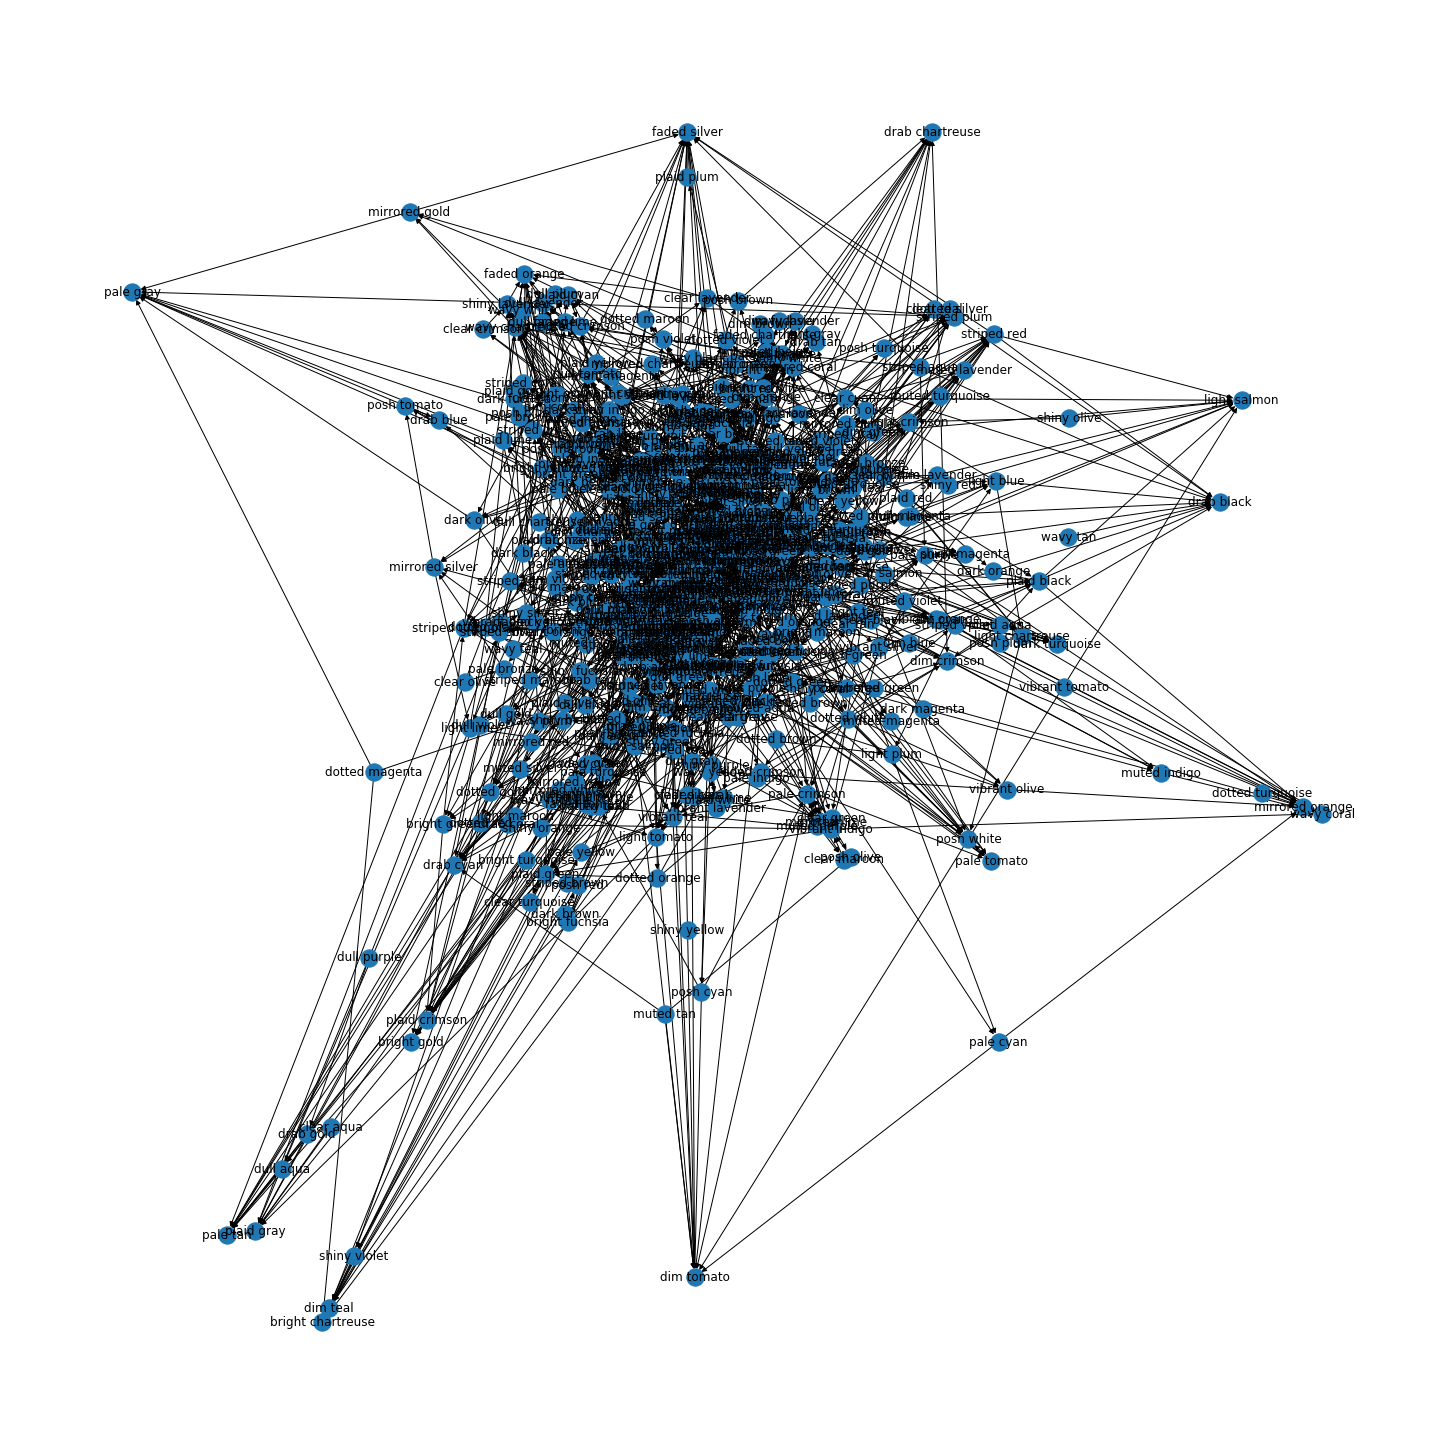

In [989]:
### Fine. We'll make a graph then. Directed graphs work well for this; essentially they form networks that move from one node to the next until there are no more nodes to move to, exactly the way ours does.
Net = nx.DiGraph()

#### For each bag (line) in the data...
for bag in data[0]:
    ### ...make some of the worst regex-practice I've ever had...
    basic_friggin_regex_that_took_a_small_age = re.search("(.*) bags contain (.*)$", bag)
    ## Now, if that regex isn't empty...
    if basic_friggin_regex_that_took_a_small_age != None:
        # Extract the current colour of the bag-line (the first sub-element ([0] is the entire element) from our regex).This starts with 'shiny gold'
        colour = basic_friggin_regex_that_took_a_small_age[1]
        # now the sub-element with the bags that are still inside the current bag.
        still_inside = basic_friggin_regex_that_took_a_small_age[2]

        # Now we further divide this remaning bag with some more regex magic that totally did not take me forever.
        for bagception in re.findall("([\d]+) (.*?) bag", still_inside):
            # lastly, we add them as edges. 
            Net.add_edge(colour, bagception[1], number_of_bags = int(bagception[0]))
            
### Now we have a graph full of stuff. Let's plot it out.
fig = plt.figure(figsize = (20, 20))
nx.draw(Net, with_labels = True)

In [993]:
### Well... Now that we have this... beautiful... thing, let's use it...? I think?

### Uh...Moving on. We'll make a function now.
def bag_in_bag_counter(bag):
    ## Setting our counter to 0
    Bag_counter = 0
    ## There are 2 elements that we stored into the network: A counter and  We'll loop over both of them
    for next_bag, num_bag_in_bags in Net[bag].items():
        # What we essentially do here, is take the number of bags we placed into the edges earlier and loop over them, multiplying and adding them to the same computation for the next bag,
        # adding each outcome to our Bag_counter until there are no more bags to perform the computation on. 
        Bag_counter += num_bag_in_bags['number_of_bags'] * bag_in_bag_counter(next_bag) + num_bag_in_bags['number_of_bags']
    return(Bag_counter)

### Our result:
print("There is a whopping total of", bag_in_bag_counter("shiny gold"), "bags that we have apparently managed to stuff inside our one shiny golden bag. I mean... damn, dude.")

There is a whopping total of 1038 bags that we have apparently managed to stuff inside our one shiny golden bag. I mean... damn, dude.
